In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import category_encoders as ce

In [3]:
data = pd.read_csv('training_data.csv', delimiter=';')
data.set_index('id')

,timestamp,campaignId,platform,softwareVersion,sourceGameId,country,startCount,viewCount,clickCount,installCount,lastStart,startCount1d,startCount7d,connectionType,deviceType,install
id,,,,,,,,,,,,,,,,
5c36658fb58fad351175f0b6,2019-01-09T21:20:15.943+00:00,59687f0d896a6b0e5ce6ea15,ios,11.4.1,1373094,US,25,24,0,2,2019-01-08T18:49:48.129+00:00,1,8,cellular,"iPhone8,2",0
5c38d5ab1c16172870186b5a,2019-01-11T17:43:07.609+00:00,59687f0d896a6b0e5ce6ea15,ios,12.1,2739989,US,10,9,2,0,2019-01-09T21:20:22.855+00:00,1,4,cellular,"iPhone9,1",0
5c38815de8f4e50e256e4f9c,2019-01-11T11:43:25.168+00:00,59687f0d896a6b0e5ce6ea15,ios,12.1.2,1373094,US,27,26,0,0,2019-01-09T10:42:08.446+00:00,1,2,cellular,"iPhone7,1",0
5c409ace532d5806d2c6a5e6,2019-01-17T15:10:06.420+00:00,59687f0d896a6b0e5ce6ea15,ios,12.1.2,1217749,US,15,14,2,0,2019-01-16T19:58:11.636+00:00,3,14,wifi,"iPhone7,2",0
5c3904b92d798c41e7f3088a,2019-01-11T21:03:53.145+00:00,59687f0d896a6b0e5ce6ea15,ios,12.0.1,1373094,US,20,18,0,0,2019-01-11T21:03:05.103+00:00,13,18,cellular,"iPhone8,1",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5c4569d8dece6fe77b55e954,2019-01-21T06:42:32.822+00:00,5c3f8ddfacba384ae5d5199f,ios,12.1.1,1100513,US,20,19,0,0,2019-01-20T04:59:26.788+00:00,1,7,wifi,"iPad5,3",0
5c45e5c84cabe90e55dc62c3,2019-01-21T15:31:20.350+00:00,5c3f8ddfacba384ae5d5199f,ios,12.1.2,69149,US,1,0,0,0,NaN,1,1,wifi,"iPhone9,4",0
5c453b1a3b3223d5399206ca,2019-01-21T03:23:06.541+00:00,5c3f8ddfacba384ae5d5199f,ios,12.1.2,69149,US,8,7,0,0,2019-01-21T01:34:18.406+00:00,8,8,wifi,"iPhone8,1",0


In [4]:
data_test = pd.read_csv('test_data.csv', delimiter=';')

# EDA Train

using pandas_profiling I got some useful insight and information into dataset. 
for example: correlated features, constant values and ....

In [ ]:
#Visualization
import pandas_profiling as pp
pp.ProfileReport(data)

In this step, I will perform some operations to check what the dataset comprises of. I will check the head, shape, info and summary of the dataset and so on.

In [5]:
data.head()

,id,timestamp,campaignId,platform,softwareVersion,sourceGameId,country,startCount,viewCount,clickCount,installCount,lastStart,startCount1d,startCount7d,connectionType,deviceType,install
0,5c36658fb58fad351175f0b6,2019-01-09T21:20:15.943+00:00,59687f0d896a6b0e5ce6ea15,ios,11.4.1,1373094,US,25,24,0,2,2019-01-08T18:49:48.129+00:00,1,8,cellular,"iPhone8,2",0
1,5c38d5ab1c16172870186b5a,2019-01-11T17:43:07.609+00:00,59687f0d896a6b0e5ce6ea15,ios,12.1,2739989,US,10,9,2,0,2019-01-09T21:20:22.855+00:00,1,4,cellular,"iPhone9,1",0
2,5c38815de8f4e50e256e4f9c,2019-01-11T11:43:25.168+00:00,59687f0d896a6b0e5ce6ea15,ios,12.1.2,1373094,US,27,26,0,0,2019-01-09T10:42:08.446+00:00,1,2,cellular,"iPhone7,1",0
3,5c409ace532d5806d2c6a5e6,2019-01-17T15:10:06.420+00:00,59687f0d896a6b0e5ce6ea15,ios,12.1.2,1217749,US,15,14,2,0,2019-01-16T19:58:11.636+00:00,3,14,wifi,"iPhone7,2",0
4,5c3904b92d798c41e7f3088a,2019-01-11T21:03:53.145+00:00,59687f0d896a6b0e5ce6ea15,ios,12.0.1,1373094,US,20,18,0,0,2019-01-11T21:03:05.103+00:00,13,18,cellular,"iPhone8,1",0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3738763 entries, 0 to 3738762
Data columns (total 17 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   timestamp        object
 2   campaignId       object
 3   platform         object
 4   softwareVersion  object
 5   sourceGameId     int64 
 6   country          object
 7   startCount       int64 
 8   viewCount        int64 
 9   clickCount       int64 
 10  installCount     int64 
 11  lastStart        object
 12  startCount1d     int64 
 13  startCount7d     int64 
 14  connectionType   object
 15  deviceType       object
 16  install          int64 
dtypes: int64(8), object(9)
memory usage: 484.9+ MB


In [7]:
data.shape

(3738763, 17)

In [8]:
data.dtypes

id                 object
timestamp          object
campaignId         object
platform           object
softwareVersion    object
sourceGameId        int64
country            object
startCount          int64
viewCount           int64
clickCount          int64
installCount        int64
lastStart          object
startCount1d        int64
startCount7d        int64
connectionType     object
deviceType         object
install             int64
dtype: object

The describe() generate descriptive statistics hat summarize the central tendency, dispresion and so on.

In [9]:
#numeric = data[data.columns[data.dtypes != 'object']]
#numeric.describe()

In [10]:
data.columns

Index(['id', 'timestamp', 'campaignId', 'platform', 'softwareVersion',
       'sourceGameId', 'country', 'startCount', 'viewCount', 'clickCount',
       'installCount', 'lastStart', 'startCount1d', 'startCount7d',
       'connectionType', 'deviceType', 'install'],
      dtype='object')

In [11]:
data.duplicated().sum()

0

In [12]:
data['install'].value_counts()

0    3694019
1      44744
Name: install, dtype: int64

In [13]:
data['install'].unique()

array([0, 1], dtype=int64)

In [14]:
data.isnull().sum()

id                      0
timestamp               0
campaignId              0
platform                0
softwareVersion         0
sourceGameId            0
country               296
startCount              0
viewCount               0
clickCount              0
installCount            0
lastStart          275054
startCount1d            0
startCount7d            0
connectionType          0
deviceType              3
install                 0
dtype: int64

there are some missing value in 'country', 'deviceType' and 'lastStart'. I will deal with them using dataClean() function.
here I analyse the percentage and amount of missing values. for example about 0.07% of 'lastStart' column is null value.

In [15]:
data['lastStart'].isnull().sum()/len(data['lastStart'])

0.07356818284550265

In [16]:
data['country'].isnull().groupby(data['install']).mean()*100

install
0    0.007851
1    0.013410
Name: country, dtype: float64

about 10.5% of missing 'lastStart' values is where 'install'==1

In [17]:
data['lastStart'].isnull().groupby(data['install']).mean()*100

install
0     7.318425
1    10.526551
Name: lastStart, dtype: float64

In [18]:
len(data['campaignId'].unique())

9692

In [19]:
data['deviceType'].isnull().groupby(data['install']).mean() *100

install
0    0.000081
1    0.000000
Name: deviceType, dtype: float64

Given that an extremely few number(3 rows) of 'deviceType' is null. I will remove them

In [20]:
data[data['deviceType'].isnull()]

,id,timestamp,campaignId,platform,softwareVersion,sourceGameId,country,startCount,viewCount,clickCount,installCount,lastStart,startCount1d,startCount7d,connectionType,deviceType,install
677218,5c465379da84c94d58c5cfb6,2019-01-21T23:19:21.514+00:00,5af41f3346d16a019f9d327d,android,4.4.2,1338322,KR,3,2,0,0,2019-01-21T23:10:03.970+00:00,3,3,wifi,NaN,0
761360,5c430af24bf6e59bb83b3bcd,2019-01-19T11:33:06.012+00:00,5c336cf7a1eb190d86699b46,android,4.4.2,1782302,SE,16,15,0,0,2019-01-14T20:43:05.170+00:00,1,6,wifi,NaN,0
3550011,5c46514b71e6a44957db7164,2019-01-21T23:10:03.970+00:00,5c2491a74603327bf23d5efa,android,4.4.2,1338322,KR,2,1,0,0,2019-01-21T23:00:28.805+00:00,2,2,wifi,NaN,0


In [21]:
#data = data[data['deviceType'].notna()]

In [22]:
#data.convert_dtypes()

# EDA Test

In [23]:
data_test.head()

,id,timestamp,campaignId,platform,softwareVersion,sourceGameId,country,startCount,viewCount,clickCount,installCount,lastStart,startCount1d,startCount7d,connectionType,deviceType
0,5c4609b6eb7476266130c224,2019-01-21T18:04:38.028+00:00,598c1d93ca9cf7103cf61dcc,android,4.4.2,1515907,RU,6,5,0,0,2019-01-21T17:58:23.728+00:00,6,6,wifi,LENOVO Lenovo A536
1,5c454de3a21d3edde84568d9,2019-01-21T04:43:15.681+00:00,598c1d93ca9cf7103cf61dcc,android,5.1,2724746,MY,1,0,0,1,NaN,1,1,cellular,HUAWEI HUAWEI LUA-U22
2,5c3c4f5769db2eee0c345059,2019-01-14T08:59:03.489+00:00,598c1d93ca9cf7103cf61dcc,android,4.4.4,78130,TR,49,29,4,1,2019-01-14T08:56:10.539+00:00,4,17,wifi,samsung SM-T113
3,5c4476bdf81acd685863a34f,2019-01-20T13:25:17.556+00:00,598c1d93ca9cf7103cf61dcc,android,4.4.4,1261034,TR,1,0,0,1,NaN,1,1,wifi,samsung SM-T113
4,5c456954b7d257ead2f99568,2019-01-21T06:40:20.962+00:00,598c1d93ca9cf7103cf61dcc,android,5.1,1617990,MY,7,4,0,1,2019-01-21T06:38:38.298+00:00,3,7,cellular,OPPO X9009


In [24]:
data_test.isnull().sum()

id                      0
timestamp               0
campaignId              0
platform                0
softwareVersion         0
sourceGameId            0
country               281
startCount              0
viewCount               0
clickCount              0
installCount            0
lastStart          275256
startCount1d            0
startCount7d            0
connectionType          0
deviceType              2
dtype: int64

In [25]:
data_test.duplicated().sum()

2

In [26]:
#data_test = data_test[data_test['deviceType'].notna()]

In [27]:
#data_test = data_test.drop_duplicates()

In [28]:
data_test.isnull().sum()

id                      0
timestamp               0
campaignId              0
platform                0
softwareVersion         0
sourceGameId            0
country               281
startCount              0
viewCount               0
clickCount              0
installCount            0
lastStart          275256
startCount1d            0
startCount7d            0
connectionType          0
deviceType              2
dtype: int64

In [29]:
data.duplicated().sum()

0

In [30]:
data_test.duplicated().sum()

2

# Data Cleaning

In this part, I define a function for cleaning the dataset and making the dataset ready for encoding.
first of all, however I could fill the missing values of 'country' and 'laststart' with 'Not Specified' and the amount of mode() respectively, I decided to drop them.
then I decided to separate the 'timeStamp' and 'lastStart' using pandas.to_datetime() and also and 'deviceType'and add the produced columns to dataframe them drop the  'timeStamp', 'lastStart' and 'deviceType'. 

In [31]:
def preprocess_data(df):
    result = df.copy()
    
    result.drop_duplicates(inplace=True)
    result.dropna(inplace=True)
    

    # extract date features
    result['last_day'] = pd.to_datetime(result['lastStart'], infer_datetime_format=True).dt.day
    result['last_month'] = pd.to_datetime(result['lastStart'], infer_datetime_format=True).dt.month
    result['last_hour'] = pd.to_datetime(result['lastStart'], infer_datetime_format=True).dt.hour
    result['last_weekday'] = pd.to_datetime(result['lastStart'], infer_datetime_format=True).dt.weekday

    result['day'] = pd.to_datetime(result['timestamp'], infer_datetime_format=True).dt.day
    result['month'] = pd.to_datetime(result['timestamp'], infer_datetime_format=True).dt.month
    result['hour'] = pd.to_datetime(result['timestamp'], infer_datetime_format=True).dt.hour
    result['weekday'] = pd.to_datetime(result['timestamp'], infer_datetime_format=True).dt.weekday
    
    # month has only one value, and lastStart, and timestamp were parsed before
    result.drop(['timestamp', 'lastStart', 'month', 'startCount'], axis=1, inplace=True)
    
    return result

In [32]:
data_preproc = preprocess_data(data)

In [33]:
data_test_preproc = preprocess_data(data_test)

In [34]:
data_preproc.isnull().sum()

id                 0
campaignId         0
platform           0
softwareVersion    0
sourceGameId       0
country            0
viewCount          0
clickCount         0
installCount       0
startCount1d       0
startCount7d       0
connectionType     0
deviceType         0
install            0
last_day           0
last_month         0
last_hour          0
last_weekday       0
day                0
hour               0
weekday            0
dtype: int64

In [35]:
data_test_preproc.isnull().sum()

id                 0
campaignId         0
platform           0
softwareVersion    0
sourceGameId       0
country            0
viewCount          0
clickCount         0
installCount       0
startCount1d       0
startCount7d       0
connectionType     0
deviceType         0
last_day           0
last_month         0
last_hour          0
last_weekday       0
day                0
hour               0
weekday            0
dtype: int64

# Encoding Categorical Data

Although, some models can get categorical data as input, I have decided to encode them.
at the first, I chose the TargetEncoder from category_encoders library, but it needed the target value for encoding. then we could not use it for the test file which is without 'install' column. so I decided to use one of the most common encoders that is somehow suitable for our large dataset.

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PowerTransformer
label_encoder = LabelEncoder()
#power_transformer = PowerTransformer()

In [37]:
def encoder(df):
    result = df.copy()

    categorical_cols = ['platform', 
                        'softwareVersion', 
                        'country', 
                        'connectionType', 
                        'deviceType'] 

    for feature in categorical_cols:
        result[feature] = label_encoder.fit_transform(result[feature].astype(str).values)

    result.convert_dtypes()

    return result

In [38]:
encoded_data = encoder(data_preproc)

In [39]:
encoded_data.isnull().sum()

id                 0
campaignId         0
platform           0
softwareVersion    0
sourceGameId       0
country            0
viewCount          0
clickCount         0
installCount       0
startCount1d       0
startCount7d       0
connectionType     0
deviceType         0
install            0
last_day           0
last_month         0
last_hour          0
last_weekday       0
day                0
hour               0
weekday            0
dtype: int64

In [40]:
encoded_data_test = encoder(data_test_preproc)

In [41]:
encoded_data.duplicated().sum()

0

In [42]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3463450 entries, 0 to 3738762
Data columns (total 21 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   campaignId       object
 2   platform         int32 
 3   softwareVersion  int32 
 4   sourceGameId     int64 
 5   country          int32 
 6   viewCount        int64 
 7   clickCount       int64 
 8   installCount     int64 
 9   startCount1d     int64 
 10  startCount7d     int64 
 11  connectionType   int32 
 12  deviceType       int32 
 13  install          int64 
 14  last_day         int64 
 15  last_month       int64 
 16  last_hour        int64 
 17  last_weekday     int64 
 18  day              int64 
 19  hour             int64 
 20  weekday          int64 
dtypes: int32(5), int64(14), object(2)
memory usage: 515.3+ MB


# Visualization

###### Here I use some plots to visualize the data distribution and the number of features' value and etc.

As you can see we have an imbalanced dataset.

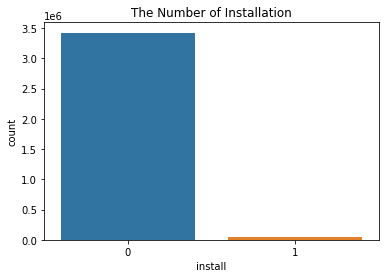

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='install',data=data_preproc)
plt.title('The Number of Installation')
plt.show()

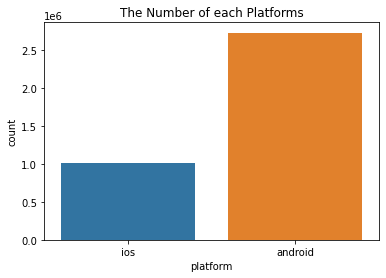

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='platform',data=data)
plt.title('The Number of each Platforms')
plt.show()

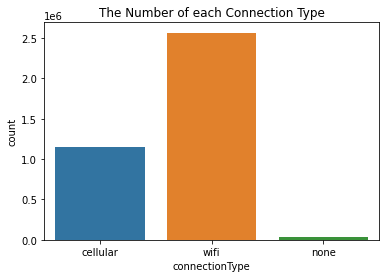

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='connectionType',data=data)
plt.title('The Number of each Connection Type')
plt.show()

Text(0.5, 1.0, 'Connection type vs. Installs')

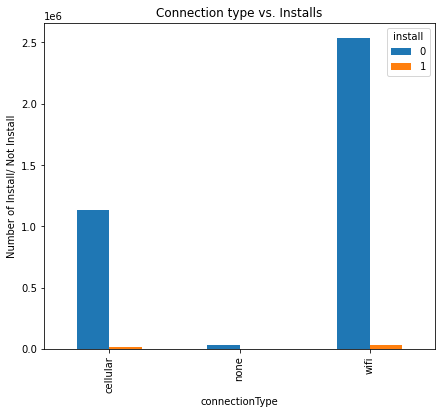

In [46]:
data.groupby(['connectionType', 'install']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(7,6))
plt.ylabel('Number of Install/ Not Install')
plt.title('Connection type vs. Installs')

Text(0.5, 1.0, 'Installation per Hour')

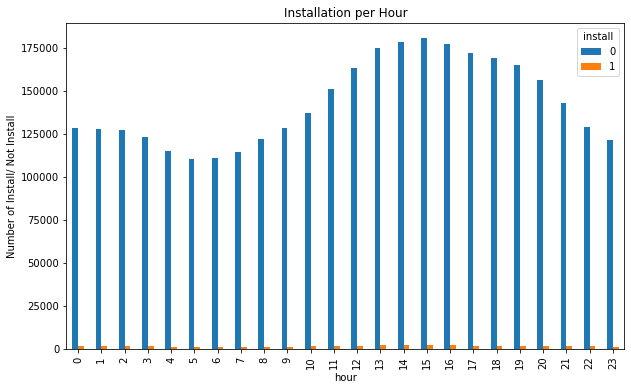

In [47]:
data_preproc.groupby(['hour', 'install']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(10,6))
plt.ylabel('Number of Install/ Not Install')
plt.title('Installation per Hour')

Text(0.5, 1.0, 'Platform vs. Installs')

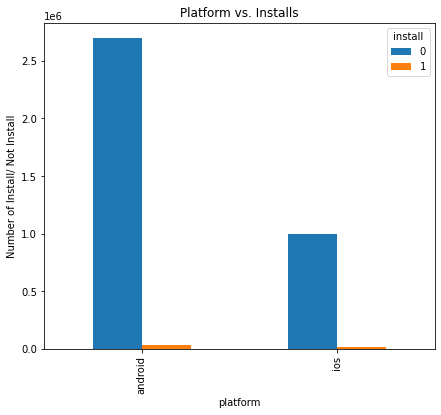

In [48]:
data.groupby(['platform', 'install']).size().unstack().plot(kind='bar', title="Platform", figsize=(7,6))
plt.ylabel('Number of Install/ Not Install')
plt.title('Platform vs. Installs')

Text(0.5, 1.0, 'Number of installs per day')

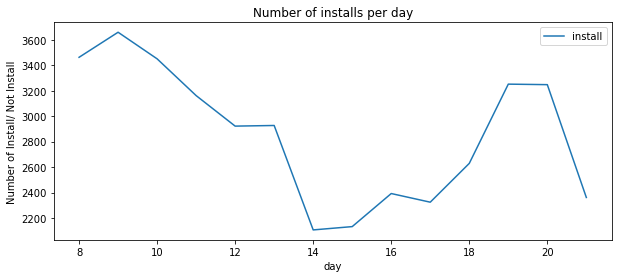

In [49]:
data_preproc.groupby('day').agg({'install':'sum'}).plot(figsize=(10,4))
plt.ylabel('Number of Install/ Not Install')
plt.title('Number of installs per day')

As it is obvious, the peak hour for installing is from about 13 to 17.

Text(0.5, 1.0, 'Number of installs per Hour')

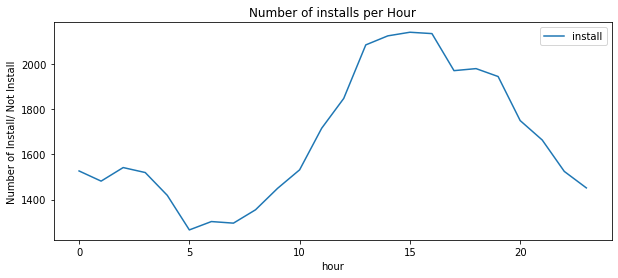

In [50]:
data_preproc.groupby('hour').agg({'install':'sum'}).plot(figsize=(10,4))
plt.ylabel('Number of Install/ Not Install')
plt.title('Number of installs per Hour')

<AxesSubplot:>

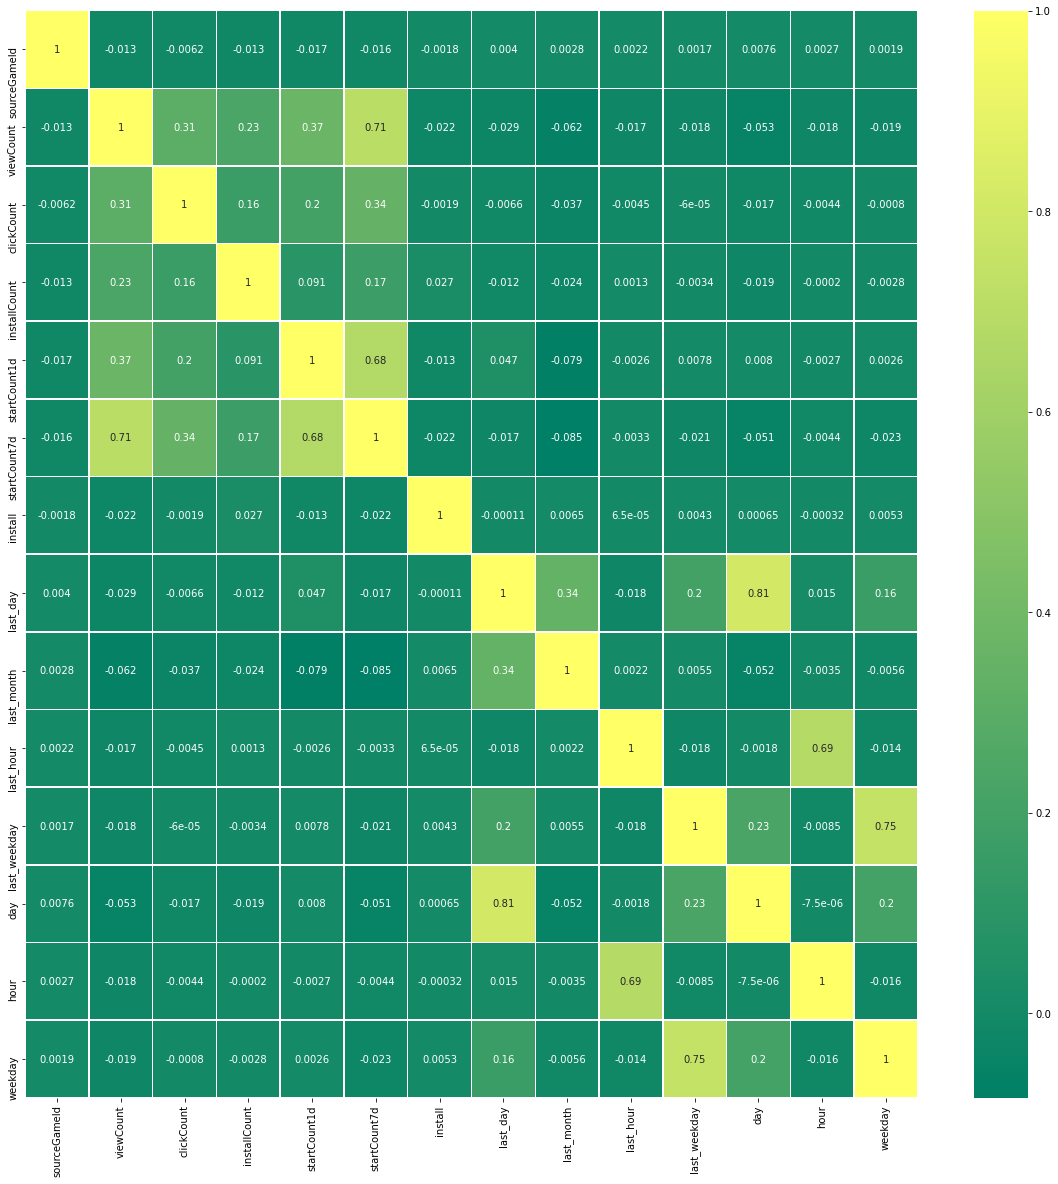

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(data_preproc.corr(),annot=True, linewidth= 0.5, cmap='summer' )

using heatmap we can get some useful insights into the dataset. for example, 'viewCount' and 'startCount' were highly correlated, so we have to keep one of them.
or we can drop some columns that are not much correlated with the target value and etc. 

# Dealing with Imbalanced Dataset
#### Undersampling

In [57]:
from numpy import mean

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


import imblearn
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt 

In [58]:
x = encoded_data.drop(['id', 'campaignId', 'install'], axis=1)
y = encoded_data['install']

x_ts = encoded_data_test.drop(['id', 'campaignId'], axis=1)

In [59]:
rus = RandomUnderSampler(random_state=42, sampling_strategy='majority')

In [60]:
x_res, y_res = rus.fit_resample(x, y)

In [61]:
y_res.value_counts()

1    40029
0    40029
Name: install, dtype: int64

In [62]:
len(x_res.columns)

18

In [63]:
from collections import Counter
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 40029, 1: 40029})


#### Cross Validation

using pipeline for cross validation and standardization

In [64]:
pipelines = []
pipelines.append(('resampled_LR' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LogisticRegression())]))))
pipelines.append(('resampled_RNF' , (Pipeline([('scaled' , StandardScaler()), ('random_forest', RandomForestClassifier())]))))
pipelines.append(('resampled_GBC' , (Pipeline([('scaled' , StandardScaler()), ('gradient_boosting', GradientBoostingClassifier())]))))
pipelines.append(('resampled_DT' , (Pipeline([('scaled' , StandardScaler()),('DT' ,DecisionTreeClassifier())]))))
#pipelines.append(('resampled_SVC' , (Pipeline([('scaled' , StandardScaler()),('SVC' ,SVC())]))))
pipelines.append(('resampled_KNN' , (Pipeline([('scaled' , StandardScaler()),('KNN' ,KNeighborsClassifier())]))))


The goal of cross validation is to do a thing that can ordinarily only be done with an out-of-training sample, using only training data. For example, accuracy on the training set is pretty meaningless for many model families (especially decision trees, which are notorious for overfitting). The score of interest is accuracy on out-of-training data. One way to measure this is to set aside a test set. Another way that does not involve setting aside perfectly good training data is to do cross validation.
cross_val_score estimates the expected accuracy of your model on out-of-training data (pulled from the same underlying process as the training data, of course). The benefit is that one need not set aside any data to obtain this metric, and you can still train your model on all of the available data. 
On a lower level, the importance of scoring in general is that, once you have .fit your model, it is completely unclear as to whether the model actually learned anything meaningful whatsoever. Thus, it is important to have metrics by which one can measure how well your model is doing. A common way to do this for classification problems is with accuracy on an out-of-training sample. 

In [65]:
model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10)
    crossv_results = cross_val_score(model , x_res, y_res, scoring='f1_micro', cv=kfold, n_jobs=-1)
    results.append(crossv_results)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model_name, crossv_results.mean(), crossv_results.std())
    print(msg)

['resampled_LR']: 0.254316 (0.007061)
['resampled_LR', 'resampled_RNF']: 0.470222 (0.007345)
['resampled_LR', 'resampled_RNF', 'resampled_GBC']: 0.445653 (0.035966)
['resampled_LR', 'resampled_RNF', 'resampled_GBC', 'resampled_DT']: 0.494167 (0.004181)
['resampled_LR', 'resampled_RNF', 'resampled_GBC', 'resampled_DT', 'resampled_KNN']: 0.449899 (0.017510)


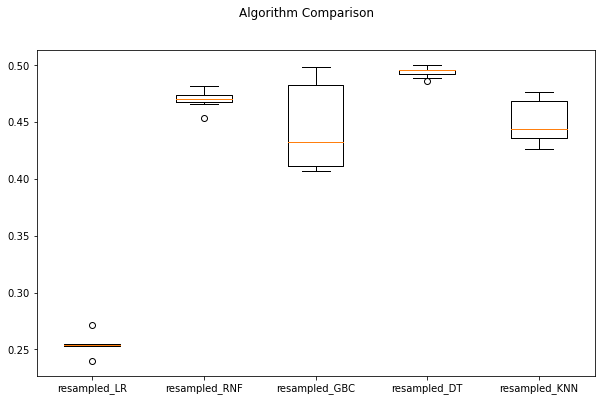

In [66]:
# Compare different Algorithms
fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()

# Split Dataset

In [67]:
x_train, x_val, y_train, y_val = train_test_split(x_res, y_res, random_state=42, train_size=0.7, shuffle=True)

# Logistic Regression

In [68]:
lr_model = LogisticRegression()

In [69]:
lr_model.fit(x_train, y_train)

LogisticRegression()

In [70]:
y_lr_pred = pd.Series(lr_model.predict(x_val))

In [71]:
print(metrics.classification_report(y_lr_pred, y_val))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67     24018
           1       0.00      0.00      0.00         0

    accuracy                           0.50     24018
   macro avg       0.50      0.25      0.33     24018
weighted avg       1.00      0.50      0.67     24018



In [72]:
metrics.f1_score(y_val, y_lr_pred)

0.0

In [73]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_lr_pred, pos_label=2)

In [74]:
metrics.confusion_matrix(y_val, y_lr_pred)

array([[12006,     0],
       [12012,     0]], dtype=int64)

#### Feature selection

In [75]:
#Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), 
#the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller 
#and smaller sets of features.  Selected (i.e., estimated best) features are assigned rank 1.
from sklearn.feature_selection import RFE

rfe = RFE(lr_model, 18)
rfe = rfe.fit(x, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [76]:
x.columns

Index(['platform', 'softwareVersion', 'sourceGameId', 'country', 'viewCount',
       'clickCount', 'installCount', 'startCount1d', 'startCount7d',
       'connectionType', 'deviceType', 'last_day', 'last_month', 'last_hour',
       'last_weekday', 'day', 'hour', 'weekday'],
      dtype='object')

# Gradient Boosting Classifier

In [77]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(x_train, y_train)

In [78]:
gbc_predicted = gbc.predict(x_val)

In [79]:
metrics.confusion_matrix(y_val, gbc_predicted)

array([[7256, 4750],
       [4514, 7498]], dtype=int64)

In [80]:
xgb_predicted = pd.DataFrame(gbc_predicted)
fpr, tpr , thresholds = metrics.roc_curve(y_val,gbc_predicted)
metrics.auc(fpr, tpr)

0.6142868043167894

In [81]:
metrics.f1_score(gbc_predicted, y_val)

0.6181368507831821

In [82]:
metrics.precision_score(y_val, gbc_predicted)

0.6121815806662312

In [83]:
metrics.recall_score(y_val, gbc_predicted)

0.6242091242091242

No handles with labels found to put in legend.


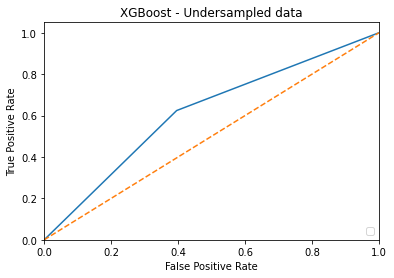

In [84]:
import matplotlib.pyplot as plt
plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - Undersampled data')
plt.legend(loc="lower right")
plt.show()


# XGBOOST

In [85]:
from sklearn import metrics, preprocessing

In [86]:
from xgboost import XGBClassifier

In [87]:
xgb_model = XGBClassifier(learning_rate =0.1, n_estimators=1000,
                          eta= 0.01,
                          max_depth=5, min_child_weight=1,
                          objective= 'binary:hinge',
                          eval_metrics='aucpr'
                         )

In [88]:
xgb_model = xgb_model.fit(x_train, y_train)

[23:07:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { eval_metrics } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [89]:
xgb_predicted = xgb_model.predict(x_val)

In [90]:
xgb_predicted

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [91]:
#y_pred = [1 for i in y_pred if i > 0.7]

#xgb_predicted = [1 if i>0.6 else 0 for i in xgb_predicted]


In [92]:
metrics.confusion_matrix(y_val, xgb_predicted)

array([[5635, 6371],
       [2932, 9080]], dtype=int64)

In [93]:
xgb_predicted = pd.DataFrame(xgb_predicted)
fpr, tpr , thresholds = metrics.roc_curve(y_val,xgb_predicted)
metrics.auc(fpr, tpr)

0.6126297074572936

In [94]:
metrics.f1_score(xgb_predicted, y_val)

0.6612533226522959

In [95]:
metrics.precision_score(y_val, xgb_predicted)

0.5876642288525015

In [96]:
metrics.recall_score(y_val, xgb_predicted)

0.755910755910756

In [97]:
xgb_model = xgb_model.save_model('xgb_model.json')

No handles with labels found to put in legend.


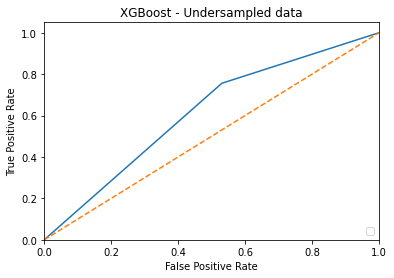

In [98]:
import matplotlib.pyplot as plt
plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - Undersampled data')
plt.legend(loc="lower right")
plt.show()


# CatBoost Model

In [99]:
import numpy as np
import catboost as cb
from catboost import CatBoostClassifier, Pool

In [100]:
clf_catboost = CatBoostClassifier(
    #iterations=100,
    loss_function='Logloss',
    random_seed=42,
    verbose=200,
    learning_rate=0.5,
    eval_metric='F1',
    od_type='IncToDec')

In [101]:
x_train_pooled = Pool(data=x_train, label=y_train)
x_val_pooled = Pool(data=x_val, label=y_val)

In [102]:
clf_catboost.fit(x_train_pooled, 
                 #cat_features=cat_features,
                 eval_set=x_val_pooled,
                 use_best_model=True,
                 plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6146515	test: 0.6115016	best: 0.6115016 (0)	total: 226ms	remaining: 3m 45s
200:	learn: 0.7196593	test: 0.6190302	best: 0.6450349 (3)	total: 6.99s	remaining: 27.8s
400:	learn: 0.7705747	test: 0.6093603	best: 0.6450349 (3)	total: 13.9s	remaining: 20.8s
600:	learn: 0.8132975	test: 0.6062618	best: 0.6450349 (3)	total: 23s	remaining: 15.3s
800:	learn: 0.8453739	test: 0.5974444	best: 0.6450349 (3)	total: 30.5s	remaining: 7.57s
999:	learn: 0.8738032	test: 0.5964103	best: 0.6450349 (3)	total: 38.6s	remaining: 0us

bestTest = 0.6450349436
bestIteration = 3

Shrink model to first 4 iterations.


In [103]:
clf_catboost.save_model('Catboost_model.cbm')

The initial prediction score of all instances, global bias
For sufficient number of iterations, changing this value will not have too much effect.

In [104]:
clf_catboost.best_score_

{'learn': {'Logloss': 0.36156712417621145, 'F1': 0.8740043701980686},
 'validation': {'Logloss': 0.6450532890505649, 'F1': 0.6450349435527225}}

In [105]:
y_pred = clf_catboost.predict(data=x_val_pooled)

In [106]:
y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [107]:
print('Model is fitted: ', str(clf_catboost.is_fitted()))
print('Model params:')
#print(clf_catboost.get_params())
a = clf_catboost.eval_metrics(x_train_pooled,metrics=['F1', 'AUC', 'Recall', 'Precision'])
b = clf_catboost.eval_metrics(x_val_pooled,metrics=['F1', 'AUC', 'Recall', 'Precision'])
print('Train = {}'.format(a), '\n')
print('Validation = {}'.format(b))

Model is fitted:  True
Model params:
Train = {'F1': [0.614651517720875, 0.6335432472190542, 0.619358214161144, 0.6451644591430771], 'AUC': [0.6367849921248574, 0.6507006433106385, 0.6594062451245136, 0.6632947449456832], 'Recall': [0.6468572652318235, 0.6840489702680516, 0.6337937680693865, 0.7032515972445301], 'Precision': [0.5855005976803541, 0.5899827607437508, 0.6055655969716605, 0.5959409594095941]} 

Validation = {'F1': [0.6115015974440895, 0.6292805894900135, 0.6149872919570386, 0.6450349435527225], 'AUC': [0.6310033669478947, 0.6458326572644414, 0.6546317944368919, 0.6595748773409943], 'Recall': [0.6373626373626373, 0.6754079254079254, 0.6244588744588745, 0.6992174492174492], 'Precision': [0.5876573533926926, 0.5890510418935598, 0.6057987401066064, 0.5986457590876693]}


In [108]:
metrics.roc_auc_score(y_val,y_pred)

0.615100978481788

In [109]:
from catboost.utils import get_roc_curve
fpr, tpr, thresholds = get_roc_curve(clf_catboost, x_val_pooled)

No handles with labels found to put in legend.


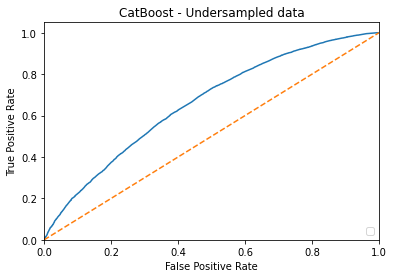

In [110]:
plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost - Undersampled data')
plt.legend(loc="lower right")
plt.show()

# Predict The Test Data Install Probability/ Using CatBoost Model

I decided to choose the best model with highest f1 score, recall and precision to predict the result. 
I did not use accuracy metric for evaluating my models, since we have an imbalance and large dataset and the possibility of overfitting is high.
and usually we think a high accuracy demonstrates the high model performance, but it is not true. so, I decided to build and use different models.  Because I have never worked with such a large and imbalanced dataset in my previous projects. so, it was really interesting for me to search and learn how to deal with imbalanced large dataset, with categorical features.
I have tried to do hyperparameter tunning to optimize my models. I did all my best, the result was not my desirable,though.
It was such a great experience for me.

In [111]:
y_data_test_prob = clf_catboost.predict_proba(x_ts)
y_data_test = clf_catboost.predict(x_ts)

In [112]:
len(x_ts)

3464449

In [113]:
install_dict = {'installProbability' : y_data_test_prob[:,1]}
install_df = pd.DataFrame.from_dict(install_dict)

In [114]:
impression_id = encoded_data_test.id

In [115]:
impression_df = pd.DataFrame(data=impression_id, columns=['id'], index=None).reset_index()

In [116]:
impression_df.drop(['index'], axis=1, inplace=True)

In [117]:
final_df = pd.concat([install_df, impression_df], axis=1)

In [118]:
final_df

,installProbability,id
0,0.449687,5c4609b6eb7476266130c224
1,0.531374,5c3c4f5769db2eee0c345059
2,0.544947,5c456954b7d257ead2f99568
3,0.530629,5c45f97db6be0f1b062052a5
4,0.596738,5c380aaeef8e5c76e685207c
...,...,...
3464444,0.483449,5c4483e01bc3437224fdd472
3464445,0.202004,5c44b040ce90758fc1d65004
3464446,0.578778,5c464e6d9c46ca4bc9c7e5da
3464447,0.217194,5c429ceed6b23d639c5dcacb


In [119]:
final_df.to_csv('final_results.csv', index=False)

# FUTURE WORK

During this project, I have tried lots of different methods and approaches.I also tried to build a high performance Neural Network model. but I think I can work on it to make it better. In my opinion, that would be really high performance and would make great predictions.
I also will check the model performance using different encoders, standardization methods and so on to see which one will lead me to the best model. 